In [ ]:
import os
import json
from collections import Counter
x_id=[0]
x_train=[0]
x_test_same=[0]
x_test=[0]

x_6=[0]
x_7=[0]
step=[0]

model_dir='gpt2-rope-5step-forward'
for iter in list(range(2000,1000000,2000)):
    if f'checkpoint-{str(iter)}' not in os.listdir(f'../LLaMA-Factory-main/saves/{model_dir}/full/sft'):
        break
    with open(f'../LLaMA-Factory-main/saves/{model_dir}/full/sft/checkpoint-{str(iter)}/all_items.json') as f:
        a=json.load(f)
    cnt_train=[]
    cnt_test_same=[]
    cnt_test=[]
    step_train=[]
    step_test_same=[]
    step_test=[]
    for item in a:
        if item['type']=='train':
            cnt_train.append(item['gt']==item['model_ans'])
            if item['gt']==item['model_ans']:
                step_train.append(item['step'])
            else:
                step_train.append(item['step']+'-')
        elif item['type']=='test_same':
            cnt_test_same.append(item['gt']==item['model_ans'])
            if item['gt']==item['model_ans']:
                step_test_same.append(item['step'])
            else:
                step_test_same.append(item['step']+'-')
        elif item['type']=='test':
            cnt_test.append(item['gt']==item['model_ans'])
            if item['gt']==item['model_ans']:
                step_test.append(item['step'])
            else:
                step_test.append(item['step']+'-')
    print(iter,sum(cnt_train)/len(cnt_train),sum(cnt_test_same)/len(cnt_test_same),sum(cnt_test)/len(cnt_test))
    print('train    ',end=' ')
    for i in range(2,6):
        print(i,"%.2f"%(Counter(step_train)[str(i)]/(Counter(step_train)[str(i)]+Counter(step_train)[str(i)+'-'])),end=' ')
    print('\ntest_same',end=' ')
    for i in range(2,6):
        print(i,"%.2f"%(Counter(step_test_same)[str(i)]/(Counter(step_test_same)[str(i)]+Counter(step_test_same)[str(i)+'-'])),end=' ')
    print('\ntest     ',end=' ')
    for i in range(2,8):
        print(i,"%.2f"%(Counter(step_test)[str(i)]/(Counter(step_test)[str(i)]+Counter(step_test)[str(i)+'-'])),end=' ')
    print()
    step.append(iter)
    x_train.append(sum(cnt_train)/len(cnt_train)) 
    x_test_same.append(sum(cnt_test_same)/len(cnt_test_same))
    x_test.append(sum(cnt_test)/len(cnt_test))

    x_id.append((Counter(step_test)[str(2)]+Counter(step_test)[str(3)]+Counter(step_test)[str(4)]+Counter(step_test)[str(5)])/(Counter(step_test)[str(2)]+Counter(step_test)[str(3)]+Counter(step_test)[str(4)]+Counter(step_test)[str(5)]+Counter(step_test)[str(2)+'-']+Counter(step_test)[str(3)+'-']+Counter(step_test)[str(4)+'-']+Counter(step_test)[str(5)+'-']))
    x_6.append(Counter(step_test)[str(6)]/(Counter(step_test)[str(6)]+Counter(step_test)[str(6)+'-']))
    x_7.append(Counter(step_test)[str(7)]/(Counter(step_test)[str(7)]+Counter(step_test)[str(7)+'-']))


2000 0.215 0.245 0.15466666666666667
train     2 0.44 3 0.15 4 0.15 5 0.13 
test_same 2 0.55 3 0.21 4 0.12 5 0.09 
test      2 0.41 3 0.22 4 0.11 5 0.08 6 0.06 7 0.05 
4000 0.9175 0.95 0.7886666666666666
train     2 1.00 3 0.99 4 0.92 5 0.80 
test_same 2 1.00 3 0.99 4 0.96 5 0.86 
test      2 1.00 3 0.99 4 0.94 5 0.79 6 0.63 7 0.37 
6000 0.95 0.95 0.8086666666666666
train     2 1.00 3 0.99 4 0.98 5 0.87 
test_same 2 1.00 3 1.00 4 0.98 5 0.83 
test      2 1.00 3 1.00 4 0.98 5 0.87 6 0.65 7 0.36 
8000 0.985 0.9825 0.8273333333333334
train     2 1.00 3 1.00 4 1.00 5 0.97 
test_same 2 1.00 3 1.00 4 1.00 5 0.95 
test      2 1.00 3 1.00 4 0.99 5 0.96 6 0.76 7 0.26 
10000 0.99 0.99 0.8203333333333334
train     2 1.00 3 1.00 4 1.00 5 0.99 
test_same 2 1.00 3 1.00 4 1.00 5 0.99 
test      2 1.00 3 1.00 4 1.00 5 0.98 6 0.74 7 0.21 
12000 0.9875 0.9825 0.8213333333333334
train     2 1.00 3 1.00 4 1.00 5 0.98 
test_same 2 0.99 3 1.00 4 1.00 5 0.97 
test      2 1.00 3 1.00 4 1.00 5 0.99 6 0.69 7 0.

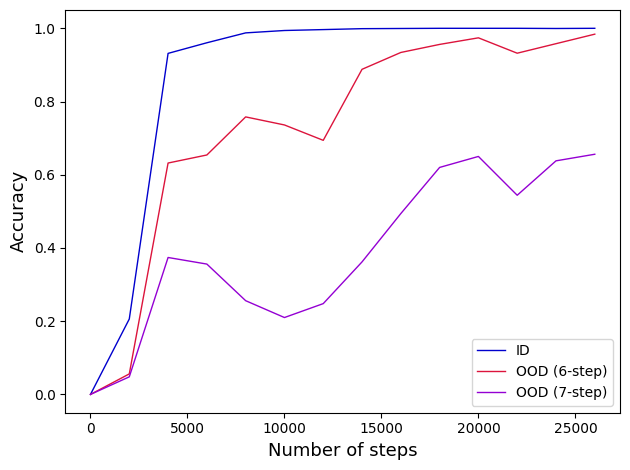

In [2]:
import matplotlib.pyplot as plt

plt.plot(step, x_id, color='mediumblue', linewidth=1, label='ID')
plt.plot(step, x_6, color='crimson', linewidth=1,label='OOD (6-step)')
plt.plot(step, x_7, color='darkviolet', linewidth=1,label='OOD (7-step)')

plt.xlabel('Number of steps', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)

plt.legend()
plt.tight_layout()
plt.show()